In [48]:
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [98]:
ConstructTimeSeries = pd.read_csv('C:/Users/bosco/Desktop/William & Mary/CTBA/M3/ConstructionTimeSeriesDatav2.csv')

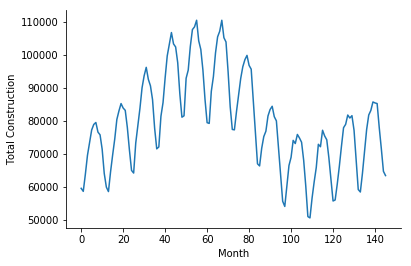

In [100]:
fig,ax = plt.subplots()
ax.plot(Total_Construction, label = 'Total Construction')
ax.set_xlabel('Month')
ax.set_ylabel('Total Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [105]:
def sqErr(row):
    return(row['Total_Construction']-row['MovAvg'])**2

ConstructTimeSeries['MovAvg'] = np.NaN
ConstructTimeSeries['sqErr'] = np.NaN
ConstructTimeSeries.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2007,month=8,day=31),periods=len(ConstructTimeSeries['Total Construction']))

window = 18

for i in range(int(window/2), ConstructTimeSeries.shape[1]-int(window/2)):
    ConstructTimeSeries.loc[ConstructTimeSeries.index[i],'MovAvg'] = (0.5*ConstructTimeSeries.iloc[i- int(window/2)]['Total Construction'] + ConstructTimeSeries.iloc[i-16+1:i + 18])

ConstructTimeSeries['sqErr'] = (ConstructTimeSeries['Total Construction']-ConstructTimeSeries['MovAvg'])**2
#ConstructTimeSeries.dropna(how='any',inplace=True)

ZeroDivisionError: division by zero

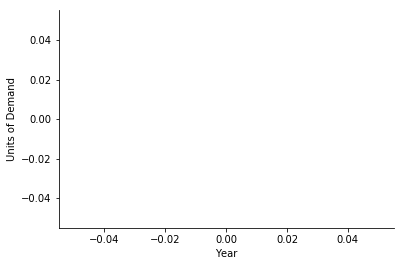

In [104]:
fig,ax = plt.subplots()
ax.plot(ConstructTimeSeries['MovAvg'],label='Moving Avg.')
ax.plot(ConstructTimeSeries['Total Construction'],label='Total Construction')
ax.set_xlabel('Month')
ax.set_ylabel("Total Construction")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

print('Average Squared Error per Month: ', sum(ConstructTimeSeries['sqErr'])/len(ConstructTimeSeries))
print(ConstructTimeSeries)

In [107]:
ConstructTimeSeries['R1'] = ConstructTimeSeries['Total Construction'] - ConstructTimeSeries['MovAvg']
ConstructTimeSeries['R1Error'] = abs((ConstructTimeSeries['Total Construction'] - ConstructTimeSeries['R1'])/ConstructTimeSeries['Total Construction'])
ConstructTimeSeries.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,1f}'.format,
    'R1': '{:,1f}'.format,
    'R1Error': '{:,.3f}'.format
})

ZeroDivisionError: division by zero

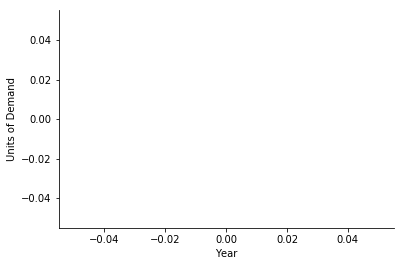

In [108]:
fig,ax = plt.subplots()
ax.plot(ConstructTimeSeries['R1'])
ax.set_xlabel('Month')
ax.set_ylabel('Total Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual:',sum(ConstructTimeSeries['R1'])/len(ConstructTimeSeries))

In [110]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = ConstructTimeSeries['R1'].autocorr(lag=i)
    print('Correlation, lag',i,' ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period =', period, '  Maximum Correlation =', maxCorr)

Correlation, lag 1   nan
Correlation, lag 2   nan
Correlation, lag 3   nan
Correlation, lag 4   nan
Correlation, lag 5   nan
Correlation, lag 6   nan
Correlation, lag 7   nan
Correlation, lag 8   nan
Correlation, lag 9   nan
Correlation, lag 10   nan
Correlation, lag 11   nan
Correlation, lag 12   nan
Correlation, lag 13   nan
Correlation, lag 14   nan
Correlation, lag 15   nan
Correlation, lag 16   nan
Correlation, lag 17   nan
Correlation, lag 18   nan
Correlation, lag 19   nan
Correlation, lag 20   nan
Correlation, lag 21   nan
Correlation, lag 22   nan
Correlation, lag 23   nan
Correlation, lag 24   nan
Correlation, lag 25   nan
Correlation, lag 26   nan
Correlation, lag 27   nan
Correlation, lag 28   nan
Correlation, lag 29   nan
Correlation, lag 30   nan
Correlation, lag 31   nan
Correlation, lag 32   nan
Correlation, lag 33   nan
Correlation, lag 34   nan
Correlation, lag 35   nan
Correlation, lag 36   nan
period = nan   Maximum Correlation = 0.0


In [112]:
period = 36
cycleLen = period
numCycle = int(len(ConstructTimeSeries)/cycleLen + 0.5)
cycle = [ConstructTimeSeries.iloc[range(i,len(ConstructTimeSeries['R1']),period)]['R1'].tolist() for i in range(period)]
ptsInCycles = [ConstructTimeSeries.iloc[range(i,len(ConstructTimeSeries['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values, label='Cycle' +str(i),c='k')
    
ax.plot(avg,label='Average Cycle', c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Total Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

ZeroDivisionError: division by zero

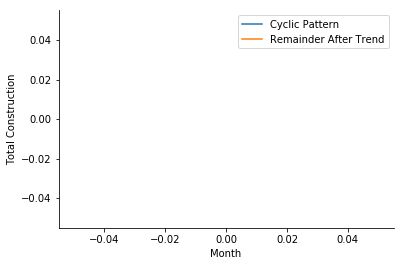

In [113]:
cycleLen = period
numCycle = int(len(ConstructTimeSeries)/cycleLen + 0.5)
ConstructTimeSeries['C'] = np.NaN

for i in range(len(ConstructTimeSeries)):
    ConstructTimeSeries.loc[ConstructTimeSeries.index[i],'C'] = avg[i%cycleLen]

fig,ax = plt.subplots()
ax.plot(ConstructTimeSeries['C'],label = 'Cyclic Pattern')
ax.plot(ConstructTimeSeries['R1'],label = 'Remainder After Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Total Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

In [115]:
ConstructTimeSeries['R2'] = ConstructTimeSeries['R1'] - ConstructTimeSeries['C']
ConstructTimeSeries['R2Error'] = abs(ConstructTimeSeries['R2']/ConstructTimeSeries['Total Construction'])
ConstructTimeSeries['fit'] = ConstructTimeSeries['MovAvg']+ConstructTimeSeries['C']
ConstructTimeSeries.drop(['sqErr'],axis=1,inplace=True)
print('Average Error:', sum(ConstructTimeSeries['R2Error'])/len(ConstructTimeSeries))
print(ConstructTimeSeries)

fig,ax = plt.subplots()
ax.plot(ConstructTimeSeries['Total Construction'],label = 'Total Construction')
ax.plot(ConstructTimeSeries['fit'],label = 'fit')
ax.set_xlabel('Month')
ax.set_ylabel('Total Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

ZeroDivisionError: division by zero

Correlation, lag 1   nan
Correlation, lag 2   nan
Correlation, lag 3   nan
Correlation, lag 4   nan
Correlation, lag 5   nan
Correlation, lag 6   nan
Correlation, lag 7   nan
Correlation, lag 8   nan
Correlation, lag 9   nan
Correlation, lag 10   nan
Correlation, lag 11   nan
Correlation, lag 12   nan
Correlation, lag 13   nan
Correlation, lag 14   nan
Correlation, lag 15   nan
Correlation, lag 16   nan
Correlation, lag 17   nan
Correlation, lag 18   nan
Correlation, lag 19   nan
Correlation, lag 20   nan
Correlation, lag 21   nan
Correlation, lag 22   nan
Correlation, lag 23   nan
Correlation, lag 24   nan
Correlation, lag 25   nan
Correlation, lag 26   nan
Correlation, lag 27   nan
Correlation, lag 28   nan
Correlation, lag 29   nan
Correlation, lag 30   nan
Correlation, lag 31   nan
Correlation, lag 32   nan
Correlation, lag 33   nan
Correlation, lag 34   nan
Correlation, lag 35   nan
Correlation, lag 36   nan
period = nan   Maximum Correlation 0.0


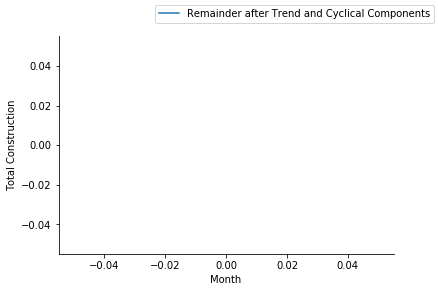

In [116]:
fig,ax = plt.subplots()
ax.plot(ConstructTimeSeries['R2'],label = 'Remainder after Trend and Cyclical Components')
ax.set_xlabel('Month')
ax.set_ylabel('Total Construction')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr =ConstructTimeSeries['R2'].autocorr(lag=i)
    print('Correlation, lag',i,' ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period =',period, '  Maximum Correlation', maxCorr)